In [118]:
import pandas as pd
import numpy as np

from surprise import accuracy
from surprise import SVD, NMF
from surprise import Dataset
from surprise import Reader
from surprise import NormalPredictor
from surprise import KNNBasic, KNNWithMeans, KNNWithZScore, KNNBaseline
from surprise.model_selection import cross_validate
from surprise.model_selection import KFold
from surprise.model_selection import GridSearchCV

The csv 'ratings.csv' is not included here, but can be downloaded from the kaggle directory in the first notebook: '1_Data.ipynb'

In [128]:
### Read in the ratings_small (user-item) dataframe
df_ratings = pd.read_csv('data/ratings.csv', nrows=1000000)

In [120]:
df_all = pd.read_csv('data/dataframe_merged_filter.csv', usecols=['id', 'title'])

In [121]:
df_ratings = df_ratings[df_ratings['movieId'].isin(df_all['id'])]

In [122]:
df_ratings

userId  movieId  rating   timestamp
0            1      110     1.0  1425941529
1            1      147     4.5  1425942435
2            1      858     5.0  1425941523
4            1     1246     5.0  1425941556
5            1     1968     4.0  1425942148
...        ...      ...     ...         ...
999993   10183      377     5.0   833460368
999994   10183      378     5.0   833461211
999995   10183      380     4.0   833459432
999996   10183      381     4.0   833460156
999997   10183      410     3.0   833459559

[415409 rows x 4 columns]

In [123]:
print('Amount of reviews for df_ratings: ', len(df_ratings))

Amount of reviews for df_ratings:  415409


In [124]:
df_ratings.tail(10)

userId  movieId  rating  timestamp
999978   10183      344     3.0  833459462
999979   10183      348     3.0  833460122
999980   10183      349     5.0  833459462
999981   10183      350     4.0  833460139
999987   10183      364     5.0  833459740
999993   10183      377     5.0  833460368
999994   10183      378     5.0  833461211
999995   10183      380     4.0  833459432
999996   10183      381     4.0  833460156
999997   10183      410     3.0  833459559

In [88]:
# Set the reader to have a rating_scale from 1-5 (default)
reader = Reader(rating_scale=(1, 5))

In [89]:
# The data only consists of userId, movieId, and rating
data = Dataset.load_from_df(df_ratings[['userId', 'movieId', 'rating']], reader)

In [90]:
knnbasic_cv = cross_validate(KNNBasic(), data, cv=2, verbose=False)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


KeyboardInterrupt: 

In [74]:
knnmeans_cv = cross_validate(KNNWithMeans(), data, cv=2, verbose=False)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


In [75]:
knnz_cv = cross_validate(KNNWithZScore(), data, cv=2, verbose=False)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


In [79]:
knnbase_cv = cross_validate(KNNBaseline(), data, cv=2, verbose=False)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.


In [80]:
print('Algorithm\t RMSE\t\t MAE')
print()
print('KNN Basic', '\t', round(knnbasic_cv['test_rmse'].mean(), 4), '\t', round(knnbasic_cv['test_mae'].mean(), 4))
print('KNN Means', '\t', round(knnmeans_cv['test_rmse'].mean(), 4), '\t', round(knnmeans_cv['test_mae'].mean(), 4))
print('KNN ZScore', '\t', round(knnz_cv['test_rmse'].mean(), 4), '\t', round(knnz_cv['test_mae'].mean(), 4))
print('KNN Baseline', '\t', round(knnbase_cv['test_rmse'].mean(), 4), '\t', round(knnbase_cv['test_mae'].mean(), 4))

Algorithm	 RMSE		 MAE

KNN Basic 	 0.9319 	 0.7161
KNN Means 	 0.9103 	 0.6999
KNN ZScore 	 0.9101 	 0.6968
KNN Baseline 	 0.8808 	 0.6765


In [34]:
knnbasic_cv['test_rmse'].mean()

0.9258665436157856

Low scores are better


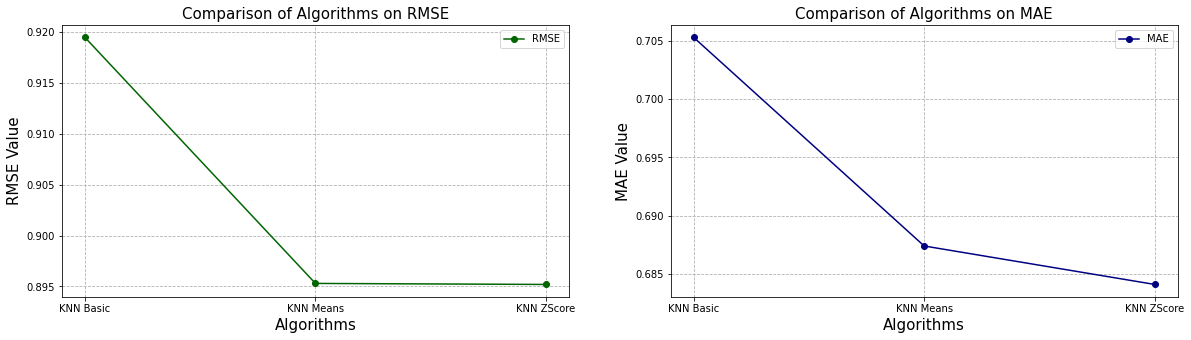

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

x_algo = ['KNN Basic', 'KNN Means', 'KNN ZScore']
all_algos_cv = [knnbasic_cv, knnmeans_cv, knnz_cv]

rmse_cv = [round(res['test_rmse'].mean(), 4) for res in all_algos_cv]
mae_cv = [round(res['test_mae'].mean(), 4) for res in all_algos_cv]

plt.figure(figsize=(20,5))

plt.subplot(1, 2, 1)
plt.title('Comparison of Algorithms on RMSE', loc='center', fontsize=15)
plt.plot(x_algo, rmse_cv, label='RMSE', color='darkgreen', marker='o')
plt.xlabel('Algorithms', fontsize=15)
plt.ylabel('RMSE Value', fontsize=15)
plt.legend()
plt.grid(ls='dashed')

plt.subplot(1, 2, 2)
plt.title('Comparison of Algorithms on MAE', loc='center', fontsize=15)
plt.plot(x_algo, mae_cv, label='MAE', color='navy', marker='o')
plt.xlabel('Algorithms', fontsize=15)
plt.ylabel('MAE Value', fontsize=15)
plt.legend()
plt.grid(ls='dashed')

print('Low scores are better')
plt.show()

(array([0.9  , 0.905, 0.91 , 0.915, 0.92 , 0.925, 0.93 ]),
 <a list of 7 Text major ticklabel objects>)

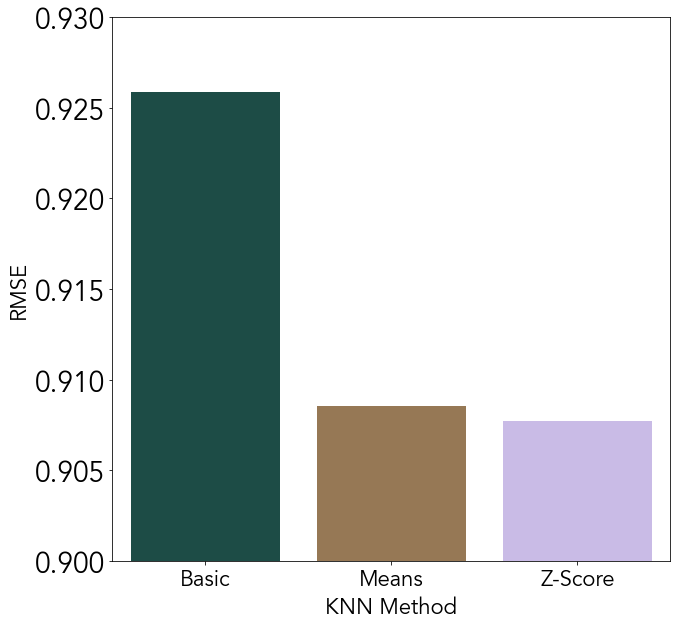

In [65]:
import seaborn as sns

fig2 = plt.figure(figsize=(10,10))
font = {'family': 'avenir', 'weight': 'normal'}
plt.rc('font', **font)

all_knn_cv = [knnbasic_cv['test_rmse'].mean(),
              knnmeans_cv['test_rmse'].mean(),
              knnz_cv['test_rmse'].mean()]

# Diagonal Line (Skip Adding Into Legend)
ax2 = sns.barplot(x = ['Basic', 'Means', 'Z-Score'],
                  y = all_knn_cv,
                  palette = 'cubehelix')

# Axes properties and labels
ax2.set_xlabel('KNN Method', fontdict=font, fontsize = 22)
ax2.set_ylabel('RMSE', fontdict=font, fontsize = 22)

plt.ylim(0.9, 0.93)
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 28)


# plt.savefig('figures/count_movies_notrated-rated.png', bbox_inches = 'tight', dpi = 300)

In [17]:
param_grid = {'k': [15, 20, 25, 30, 40, 50, 60, 80, 100, 150, 200]}

knnmeans_gs = GridSearchCV(KNNWithMeans, param_grid, measures=['rmse', 'mae'], cv=5, n_jobs=5)
knnmeans_gs.fit(data)

In [18]:
neighbors = [15, 20, 25, 30, 40, 50, 60, 80, 100, 150, 200]
y3 = knnmeans_gs.cv_results['mean_test_rmse']
y4 = knnmeans_gs.cv_results['mean_test_mae']

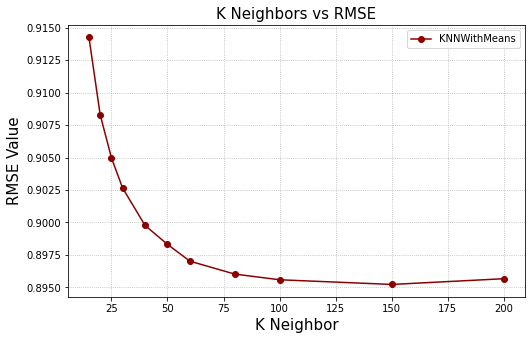

In [20]:
plt.figure(figsize=(18,5))

plt.subplot(1, 2, 1)
plt.title('K Neighbors vs RMSE', loc='center', fontsize=15)
plt.plot(neighbors, y3, label='KNNWithMeans', color='darkred', marker='o')
plt.xlabel('K Neighbor', fontsize=15)
plt.ylabel('RMSE Value', fontsize=15)
plt.legend()
plt.grid(ls='dotted')

plt.show()


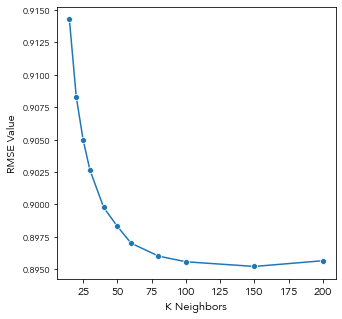

In [22]:
import seaborn as sns

fig1 = plt.figure(figsize=(5,5))
font = {'family': 'avenir', 'weight': 'normal'}
plt.rc('font', **font)

# Diagonal Line (Skip Adding Into Legend)
ax1 = sns.lineplot(x = neighbors,
                   y = y3,
                   marker='o')

# Axes properties and labels
ax1.set_xlabel('K Neighbors', fontdict=font, fontsize = 11)
ax1.set_ylabel('RMSE Value', fontdict=font, fontsize = 11)

plt.xticks(fontsize = 11)
plt.yticks(fontsize = 9)

plt.savefig('figures/knnmeans_neighbors_rmse.png', bbox_inches = 'tight', dpi = 300)

In [91]:
# Use surprise package for a train-test split of 80-20
# Note that the train-test split will split by general rows, not specific users
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=0.20)

In [92]:
# trainsetfull = data.build_full_trainset()

In [93]:
print('Number of users: ', trainset.n_users)
print('Number of movies (items): ', trainset.n_items, '\n')

Number of users:  9873
Number of movies (items):  4340 



In [100]:
trainset_iids = list(trainset.all_items())
iid_converter = lambda x: trainset.to_raw_iid(x)
trainset_raw_iids = list(map(iid_converter, trainset_iids))

In [110]:
trainset_uids = list(trainset.all_users())
uid_converter = lambda x: trainset.to_raw_uid(x)
trainset_raw_uids = list(map(uid_converter, trainset_uids))
trainset_raw_uids

[6581,
 10150,
 1020,
 2202,
 7452,
 3950,
 5641,
 10165,
 4186,
 10082,
 2291,
 6900,
 312,
 5337,
 8787,
 5497,
 340,
 6158,
 3571,
 3080,
 990,
 878,
 7311,
 3681,
 4068,
 4314,
 6812,
 6832,
 834,
 2940,
 1856,
 9007,
 9463,
 1012,
 7970,
 7040,
 4571,
 4125,
 2684,
 2406,
 8517,
 6512,
 922,
 9367,
 5695,
 390,
 2774,
 7704,
 3600,
 279,
 8330,
 1428,
 229,
 3148,
 5149,
 4837,
 506,
 2189,
 1087,
 3293,
 6171,
 1609,
 1843,
 4384,
 1053,
 8380,
 296,
 9693,
 7406,
 9896,
 2491,
 7571,
 1025,
 8014,
 3112,
 924,
 8064,
 8953,
 9769,
 1316,
 556,
 4997,
 7716,
 7841,
 633,
 6576,
 7323,
 224,
 6870,
 6979,
 1655,
 7790,
 4160,
 7144,
 9078,
 1370,
 6294,
 7796,
 8477,
 1944,
 7756,
 6513,
 3539,
 3222,
 5765,
 9164,
 4288,
 8448,
 5198,
 5633,
 7439,
 5271,
 8255,
 8289,
 9885,
 8148,
 8238,
 5378,
 2399,
 6078,
 4547,
 3473,
 2975,
 533,
 4993,
 7307,
 5624,
 7927,
 8747,
 4666,
 2218,
 3938,
 4284,
 2376,
 8171,
 1114,
 1014,
 5373,
 2929,
 7438,
 5605,
 5461,
 2654,
 7610,
 1581

In [101]:
trainset_raw_iids

[1245,
 70,
 780,
 521,
 3101,
 1367,
 1092,
 4995,
 899,
 2162,
 315,
 53318,
 6523,
 4896,
 49530,
 784,
 2139,
 4235,
 165,
 1265,
 4638,
 3578,
 527,
 1566,
 213,
 2671,
 322,
 54272,
 2232,
 2692,
 674,
 2990,
 441,
 1266,
 8012,
 253,
 2268,
 260,
 2749,
 32031,
 3686,
 708,
 508,
 595,
 1970,
 71374,
 2890,
 2144,
 594,
 293,
 1371,
 7451,
 648,
 318,
 72733,
 1213,
 158,
 8874,
 28,
 1391,
 172,
 8914,
 3176,
 2321,
 783,
 1673,
 344,
 1653,
 2108,
 25,
 296,
 1562,
 3175,
 996,
 53519,
 1580,
 4886,
 41569,
 1377,
 435,
 4993,
 5334,
 1923,
 588,
 377,
 185,
 329,
 308,
 3543,
 134368,
 350,
 442,
 1772,
 41025,
 2657,
 832,
 541,
 145,
 30707,
 1956,
 1945,
 480,
 2028,
 39183,
 858,
 8665,
 153,
 4973,
 590,
 3478,
 2762,
 943,
 161,
 1396,
 1249,
 597,
 788,
 2000,
 475,
 2882,
 266,
 54732,
 1277,
 267,
 122,
 410,
 21,
 608,
 2791,
 1921,
 31696,
 592,
 111759,
 533,
 58559,
 195,
 229,
 170,
 47200,
 4889,
 2770,
 2011,
 1968,
 1907,
 923,
 1284,
 186,
 3052,
 36529,
 10

In [161]:
my_k = 10
my_min_k = 5
my_sim_option = {
    'name':'cosine', 'user_based':False, 'verbose': False
    }
algo = KNNWithMeans(k = my_k,
                    sim_options = my_sim_option)
algo.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [149]:
trainset.ur

defaultdict(list,
            {0: [(0, 2.0), (213, 5.0)],
             1: [(1, 4.0),
              (719, 3.0),
              (289, 1.0),
              (1477, 1.0),
              (958, 5.0),
              (257, 4.0),
              (2529, 4.0),
              (907, 4.0),
              (302, 4.0),
              (199, 5.0),
              (43, 5.0),
              (678, 4.0),
              (416, 3.0),
              (518, 4.0),
              (671, 4.0),
              (875, 5.0),
              (189, 5.0),
              (196, 5.0),
              (107, 4.0),
              (206, 5.0),
              (143, 3.0),
              (240, 5.0),
              (37, 5.0),
              (272, 3.0),
              (156, 4.0),
              (144, 5.0),
              (618, 4.0),
              (666, 3.0),
              (1479, 5.0),
              (102, 4.0),
              (757, 3.0),
              (956, 5.0),
              (266, 3.0),
              (2638, 4.0),
              (971, 5.0),
              (641, 4.0),
   

In [162]:
algo.estimate(1, 110)

(4.067317100882038, {'actual_k': 10})

In [164]:
# https://github.com/NicolasHug/Surprise/blob/fa7455880192383f01475162b4cbd310d91d29ca/surprise/similarities.pyx
pd.DataFrame(algo.sim)

0         1         2         3         4         5         6     \
0     1.000000  0.953654  0.947381  0.945384  0.958033  0.965684  0.974350   
1     0.953654  1.000000  0.932598  0.943102  0.929836  0.893041  0.943799   
2     0.947381  0.932598  1.000000  0.940839  0.950796  0.946386  0.935467   
3     0.945384  0.943102  0.940839  1.000000  0.973752  0.885438  0.957150   
4     0.958033  0.929836  0.950796  0.973752  1.000000  0.914453  0.981673   
...        ...       ...       ...       ...       ...       ...       ...   
4335  1.000000  1.000000  1.000000  0.000000  1.000000  1.000000  0.000000   
4336  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4337  1.000000  1.000000  1.000000  0.000000  1.000000  1.000000  0.000000   
4338  0.000000  0.000000  1.000000  0.000000  0.000000  1.000000  0.000000   
4339  1.000000  1.000000  1.000000  0.000000  1.000000  1.000000  0.000000   

          7         8         9     ...  4330  4331  4332  4333  4334  4335  \
0     0.971168  0.971013  0.919016  ...   0.0   0.0   0.0   1.0   1.0   1.0   
1     0.962250  0.909217  0.922396  ...   0.0   0.0   0.0   1.0   1.0   1.0   
2     0.954448  0.930012  0.886797  ...   1.0   1.0   0.0   1.0   0.0   1.0   
3     0.969942  0.936718  0.872143  ...   0.0   0.0   0.0   0.0   0.0   0.0   
4     0.959580  0.948739  0.940786  ...   0.0   0.0   0.0   0.0   1.0   1.0   
...        ...       ...       ...  ...   ...   ...   ...   ...   ...   ...   
4335  1.000000  1.000000  0.000000  ...   0.0   0.0   0.0   0.0   0.0   1.0   
4336  0.000000  0.000000  0.000000  ...   0.0   0.0   0.0   0.0   0.0   0.0   
4337  1.000000  1.000000  0.000000  ...   0.0   0.0   0.0   0.0   0.0   1.0   
4338  1.000000  0.000000  0.000000  ...   0.0   0.0   0.0   0.0   0.0   0.0   
4339  1.000000  1.000000  0.000000  ...   0.0   0.0   0.0   0.0   0.0   1.0   

      4336  4337  4338  4339  
0      0.0   1.0   0.0   1.0  
1      0.0   1.0   0.0   1.0  
2      0.0   1.0   1.0   1.0  
3      0.0   0.0   0.0   0.0  
4      0.0   1.0   0.0   1.0  
...    ...   ...   ...   ...  
4335   0.0   1.0   0.0   1.0  
4336   1.0   0.0   0.0   0.0  
4337   0.0   1.0   0.0   1.0  
4338   0.0   0.0   1.0   0.0  
4339   0.0   1.0   0.0   1.0  

[4340 rows x 4340 columns]

In [52]:
# Same dataframe as algo.sim but the indices/columns are now movieId
df_cos_surprise = pd.DataFrame(algo.sim, index=trainset_raw_iids, columns=trainset_raw_iids)

df_cos_surprise

784       919       994       593       1246      2013      21      \
784     1.000000  0.909846  0.926389  0.924870  0.915637  0.908938  0.921706   
919     0.909846  1.000000  0.965513  0.960552  0.957756  0.951211  0.952140   
994     0.926389  0.965513  1.000000  0.962794  0.957448  0.942727  0.965705   
593     0.924870  0.960552  0.962794  1.000000  0.965129  0.951866  0.959409   
1246    0.915637  0.957756  0.957448  0.965129  1.000000  0.949107  0.951078   
...          ...       ...       ...       ...       ...       ...       ...   
8359    0.000000  1.000000  0.000000  1.000000  1.000000  0.000000  1.000000   
81857   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
134908  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
119675  1.000000  1.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
146216  0.000000  0.000000  0.000000  1.000000  0.000000  0.000000  0.000000   

          377       1552      1213    ...  173897    4762    124071  157825  \
784     0.917880  0.913537  0.934867  ...     1.0  0.550842     0.0     1.0   
919     0.949011  0.928496  0.961476  ...     1.0  0.993605     1.0     0.0   
994     0.944549  0.927536  0.966314  ...     0.0  1.000000     1.0     0.0   
593     0.957091  0.944057  0.975148  ...     1.0  0.843158     0.0     0.0   
1246    0.950123  0.943656  0.962311  ...     1.0  1.000000     0.0     0.0   
...          ...       ...       ...  ...     ...       ...     ...     ...   
8359    1.000000  1.000000  0.000000  ...     0.0  0.000000     0.0     0.0   
81857   1.000000  1.000000  1.000000  ...     0.0  0.000000     0.0     0.0   
134908  0.000000  0.000000  0.000000  ...     0.0  0.000000     0.0     0.0   
119675  1.000000  1.000000  0.000000  ...     0.0  0.000000     0.0     0.0   
146216  0.000000  1.000000  1.000000  ...     0.0  0.000000     0.0     0.0   

        27511   8359    81857   134908  119675  146216  
784        0.0     0.0     1.0     0.0     1.0     0.0  
919        0.0     1.0     1.0     0.0     1.0     0.0  
994        1.0     0.0     1.0     0.0     0.0     0.0  
593        0.0     1.0     1.0     0.0     0.0     1.0  
1246       0.0     1.0     1.0     0.0     0.0     0.0  
...        ...     ...     ...     ...     ...     ...  
8359       0.0     1.0     0.0     0.0     0.0     0.0  
81857      0.0     0.0     1.0     0.0     0.0     0.0  
134908     0.0     0.0     0.0     1.0     0.0     0.0  
119675     0.0     0.0     0.0     0.0     1.0     0.0  
146216     0.0     0.0     0.0     0.0     0.0     1.0  

[2484 rows x 2484 columns]

In [53]:
df_all

id                         title
0         862                     Toy Story
1        8844                       Jumanji
2       15602              Grumpier Old Men
3         949                          Heat
4       11860                       Sabrina
...       ...                           ...
10871   19307              Carry On Camping
10872   18098                Arabian Nights
10873   52103                    Pickpocket
10874  455661                In a Heartbeat
10875   49279  The Man with the Rubber Head

[10876 rows x 2 columns]

In [54]:
df_all = df_all.reset_index()
df_all.index = df_all.id

In [55]:
df_all

index      id                         title
id                                                 
862         0     862                     Toy Story
8844        1    8844                       Jumanji
15602       2   15602              Grumpier Old Men
949         3     949                          Heat
11860       4   11860                       Sabrina
...       ...     ...                           ...
19307   10871   19307              Carry On Camping
18098   10872   18098                Arabian Nights
52103   10873   52103                    Pickpocket
455661  10874  455661                In a Heartbeat
49279   10875   49279  The Man with the Rubber Head

[10876 rows x 3 columns]

In [56]:
movieIdtoindex = df_all['index'].to_dict()

In [57]:
df_cos_surprise = df_cos_surprise.rename(index=movieIdtoindex, columns=movieIdtoindex)

In [58]:
df_cos_surprise

696       4103      2757      1638      4934      5241      1703   \
696    1.000000  0.909846  0.926389  0.924870  0.915637  0.908938  0.921706   
4103   0.909846  1.000000  0.965513  0.960552  0.957756  0.951211  0.952140   
2757   0.926389  0.965513  1.000000  0.962794  0.957448  0.942727  0.965705   
1638   0.924870  0.960552  0.962794  1.000000  0.965129  0.951866  0.959409   
4934   0.915637  0.957756  0.957448  0.965129  1.000000  0.949107  0.951078   
...         ...       ...       ...       ...       ...       ...       ...   
5452   0.000000  1.000000  0.000000  1.000000  1.000000  0.000000  1.000000   
7551   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
10166  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
7401   1.000000  1.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
7475   0.000000  0.000000  0.000000  1.000000  0.000000  0.000000  0.000000   

          649       1651      1488   ...  10475     2725   7451   8056   \
696    0.917880  0.913537  0.934867  ...    1.0  0.550842    0.0    1.0   
4103   0.949011  0.928496  0.961476  ...    1.0  0.993605    1.0    0.0   
2757   0.944549  0.927536  0.966314  ...    0.0  1.000000    1.0    0.0   
1638   0.957091  0.944057  0.975148  ...    1.0  0.843158    0.0    0.0   
4934   0.950123  0.943656  0.962311  ...    1.0  1.000000    0.0    0.0   
...         ...       ...       ...  ...    ...       ...    ...    ...   
5452   1.000000  1.000000  0.000000  ...    0.0  0.000000    0.0    0.0   
7551   1.000000  1.000000  1.000000  ...    0.0  0.000000    0.0    0.0   
10166  0.000000  0.000000  0.000000  ...    0.0  0.000000    0.0    0.0   
7401   1.000000  1.000000  0.000000  ...    0.0  0.000000    0.0    0.0   
7475   0.000000  1.000000  1.000000  ...    0.0  0.000000    0.0    0.0   

       3685   5452   7551   10166  7401   7475   
696      0.0    0.0    1.0    0.0    1.0    0.0  
4103     0.0    1.0    1.0    0.0    1.0    0.0  
2757     1.0    0.0    1.0    0.0    0.0    0.0  
1638     0.0    1.0    1.0    0.0    0.0    1.0  
4934     0.0    1.0    1.0    0.0    0.0    0.0  
...      ...    ...    ...    ...    ...    ...  
5452     0.0    1.0    0.0    0.0    0.0    0.0  
7551     0.0    0.0    1.0    0.0    0.0    0.0  
10166    0.0    0.0    0.0    1.0    0.0    0.0  
7401     0.0    0.0    0.0    0.0    1.0    0.0  
7475     0.0    0.0    0.0    0.0    0.0    1.0  

[2484 rows x 2484 columns]

In [59]:
# Make a pandas dataframe of movie x movie length from df_all
# Fill in the values from matrix 'algo.sim'
# Set the diagonal to "1"
df_blank = pd.DataFrame(np.nan, range(1,len(df_all)), range(1,len(df_all)))
df_blank

1      2      3      4      5      6      7      8      9      10     \
1        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
10871    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
10872    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
10873    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
10874    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
10875    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

       ...  10866  10867  10868  10869  10870  10871  10872  10873  10874  \
1      ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2      ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3      ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4      ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5      ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
10871  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
10872  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
10873  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
10874  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
10875  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

       10875  
1        NaN  
2        NaN  
3        NaN  
4        NaN  
5        NaN  
...      ...  
10871    NaN  
10872    NaN  
10873    NaN  
10874    NaN  
10875    NaN  

[10875 rows x 10875 columns]

In [60]:
df_blank = df_cos_surprise.combine_first(df_blank)

In [61]:
df_blank

0         1      2         3      4         5      6      7      \
0      1.000000  0.907959    NaN  0.931949    NaN  0.920554    NaN    NaN   
1      0.907959  1.000000    NaN  0.981885    NaN  0.825801    NaN    NaN   
2           NaN       NaN    NaN       NaN    NaN       NaN    NaN    NaN   
3      0.931949  0.981885    NaN  1.000000    NaN  0.874689    NaN    NaN   
4           NaN       NaN    NaN       NaN    NaN       NaN    NaN    NaN   
...         ...       ...    ...       ...    ...       ...    ...    ...   
10871       NaN       NaN    NaN       NaN    NaN       NaN    NaN    NaN   
10872       NaN       NaN    NaN       NaN    NaN       NaN    NaN    NaN   
10873       NaN       NaN    NaN       NaN    NaN       NaN    NaN    NaN   
10874       NaN       NaN    NaN       NaN    NaN       NaN    NaN    NaN   
10875       NaN       NaN    NaN       NaN    NaN       NaN    NaN    NaN   

       8         9      ...  10866  10867  10868  10869  10870  10871  10872  \
0        NaN  0.937961  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1        NaN  0.871309  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2        NaN       NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3        NaN  0.944227  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4        NaN       NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
...      ...       ...  ...    ...    ...    ...    ...    ...    ...    ...   
10871    NaN       NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
10872    NaN       NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
10873    NaN       NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
10874    NaN       NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
10875    NaN       NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

       10873  10874  10875  
0        NaN    NaN    NaN  
1        NaN    NaN    NaN  
2        NaN    NaN    NaN  
3        NaN    NaN    NaN  
4        NaN    NaN    NaN  
...      ...    ...    ...  
10871    NaN    NaN    NaN  
10872    NaN    NaN    NaN  
10873    NaN    NaN    NaN  
10874    NaN    NaN    NaN  
10875    NaN    NaN    NaN  

[10876 rows x 10876 columns]

In [62]:
# # Assign the diagonals as 1
# df_blank.values[[np.arange(df_blank.shape[0])]*2] = 1

In [63]:
np.fill_diagonal(df_blank.values, 1)
df_blank

0         1      2         3      4         5      6      7      \
0      1.000000  0.907959    NaN  0.931949    NaN  0.920554    NaN    NaN   
1      0.907959  1.000000    NaN  0.981885    NaN  0.825801    NaN    NaN   
2           NaN       NaN    1.0       NaN    NaN       NaN    NaN    NaN   
3      0.931949  0.981885    NaN  1.000000    NaN  0.874689    NaN    NaN   
4           NaN       NaN    NaN       NaN    1.0       NaN    NaN    NaN   
...         ...       ...    ...       ...    ...       ...    ...    ...   
10871       NaN       NaN    NaN       NaN    NaN       NaN    NaN    NaN   
10872       NaN       NaN    NaN       NaN    NaN       NaN    NaN    NaN   
10873       NaN       NaN    NaN       NaN    NaN       NaN    NaN    NaN   
10874       NaN       NaN    NaN       NaN    NaN       NaN    NaN    NaN   
10875       NaN       NaN    NaN       NaN    NaN       NaN    NaN    NaN   

       8         9      ...  10866  10867  10868  10869  10870  10871  10872  \
0        NaN  0.937961  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1        NaN  0.871309  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2        NaN       NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3        NaN  0.944227  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4        NaN       NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
...      ...       ...  ...    ...    ...    ...    ...    ...    ...    ...   
10871    NaN       NaN  ...    NaN    NaN    NaN    NaN    NaN    1.0    NaN   
10872    NaN       NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    1.0   
10873    NaN       NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
10874    NaN       NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
10875    NaN       NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

       10873  10874  10875  
0        NaN    NaN    NaN  
1        NaN    NaN    NaN  
2        NaN    NaN    NaN  
3        NaN    NaN    NaN  
4        NaN    NaN    NaN  
...      ...    ...    ...  
10871    NaN    NaN    NaN  
10872    NaN    NaN    NaN  
10873    1.0    NaN    NaN  
10874    NaN    1.0    NaN  
10875    NaN    NaN    1.0  

[10876 rows x 10876 columns]

In [64]:
df_blank = df_blank.fillna(0)

In [65]:
df_blank

0         1      2         3      4         5      6      7      \
0      1.000000  0.907959    0.0  0.931949    0.0  0.920554    0.0    0.0   
1      0.907959  1.000000    0.0  0.981885    0.0  0.825801    0.0    0.0   
2      0.000000  0.000000    1.0  0.000000    0.0  0.000000    0.0    0.0   
3      0.931949  0.981885    0.0  1.000000    0.0  0.874689    0.0    0.0   
4      0.000000  0.000000    0.0  0.000000    1.0  0.000000    0.0    0.0   
...         ...       ...    ...       ...    ...       ...    ...    ...   
10871  0.000000  0.000000    0.0  0.000000    0.0  0.000000    0.0    0.0   
10872  0.000000  0.000000    0.0  0.000000    0.0  0.000000    0.0    0.0   
10873  0.000000  0.000000    0.0  0.000000    0.0  0.000000    0.0    0.0   
10874  0.000000  0.000000    0.0  0.000000    0.0  0.000000    0.0    0.0   
10875  0.000000  0.000000    0.0  0.000000    0.0  0.000000    0.0    0.0   

       8         9      ...  10866  10867  10868  10869  10870  10871  10872  \
0        0.0  0.937961  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1        0.0  0.871309  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2        0.0  0.000000  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3        0.0  0.944227  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4        0.0  0.000000  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...      ...       ...  ...    ...    ...    ...    ...    ...    ...    ...   
10871    0.0  0.000000  ...    0.0    0.0    0.0    0.0    0.0    1.0    0.0   
10872    0.0  0.000000  ...    0.0    0.0    0.0    0.0    0.0    0.0    1.0   
10873    0.0  0.000000  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
10874    0.0  0.000000  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
10875    0.0  0.000000  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

       10873  10874  10875  
0        0.0    0.0    0.0  
1        0.0    0.0    0.0  
2        0.0    0.0    0.0  
3        0.0    0.0    0.0  
4        0.0    0.0    0.0  
...      ...    ...    ...  
10871    0.0    0.0    0.0  
10872    0.0    0.0    0.0  
10873    1.0    0.0    0.0  
10874    0.0    1.0    0.0  
10875    0.0    0.0    1.0  

[10876 rows x 10876 columns]

In [66]:
# np.save('similarity_matrix/cos_ratings_small.npy', df_blank)

In [116]:
cos_matrix = np.load('similarity_matrix/cos_ratings_small.npy')

In [143]:
# Similarity of LotR: Fellowship to LotR: Fellowship
cos_matrix[2276, 2276]

1.0

In [144]:
# Similarity of LotR: Fellowship to LotR: Two Towers
cos_matrix[2276, 2627]

0.9539408072440816

In [145]:
# Similarity of LotR: Fellowship to The Hobbit
cos_matrix[2276, 7206]

0.0

In [146]:
# Similarity of LotR: Fellowship to Frozen
cos_matrix[2276, 7638]

0.0